In [1]:
from rps.aco import ACO1, ACO2, ACO3
from rps.dataclass import *
from rps.utils.batch_run import batch_run, param_test
from multiprocessing import freeze_support

In [3]:
if __name__ == "__main__":
    freeze_support()
    graph = Graph()
    graph.load("test2")
    m = 20
    nc = 50
    alpha = 4
    beta = 4
    rho = 0.5
    q0 = 0.5
    a = 5
    t0 = 1
    alpha_2 = 4
    beta_2 = 4
    alpha_3 = 4
    beta_3 = 4
    alg1 = ACO1(m=m,nc=nc,alpha=alpha,beta=beta,rho=rho,q0=q0,a=a,t0=t0)
    alg2 = ACO2(m=m,nc=nc,alpha=alpha,beta=beta,rho=rho,q0=q0,a=a,t0=t0, alpha_2=alpha_2, beta_2=beta_2, alpha_3=alpha_3, beta_3=beta_3)
    alg3 = ACO3(m=7,nc=nc,alpha=alpha,beta=beta,rho=rho,q0=q0,a=a,t0=t0, alpha_2=alpha_2, beta_2=beta_2, alpha_3=alpha_3, beta_3=beta_3)
    
    param = 'alpha'
    # param_range = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5]
    param_range = range(1, 11)
    # param_range = [3] * 10
    
    res_range1 = []
    res_length1 = []
    res_turn1 = []
    res_converge1 = []
    
    res_range2 = []
    res_length2 = []
    res_turn2 = []
    res_converge2 = []

    res_range3 = []
    res_length3 = []
    res_turn3 = []
    res_converge3 = []

    num=10
    
    for i, res in param_test(alg1, graph, param, param_range, num, 4):
        res_range1.append(i)
        res_length1.append(res[0])
        res_turn1.append(res[1])
        res_converge1.append(res[2])

    for i, res in param_test(alg2, graph, param, param_range, num, 4):
        res_range2.append(i)
        res_length2.append(res[0])
        res_turn2.append(res[1])
        res_converge2.append(res[2])

    for i, res in param_test(alg3, graph, param, param_range, num, 4):
        res_range3.append(i)
        res_length3.append(res[0])
        res_turn3.append(res[1])
        res_converge3.append(res[2])

ACO3:alpha: 100%|██████████| 10/10 [04:18<00:00, 25.82s/it]


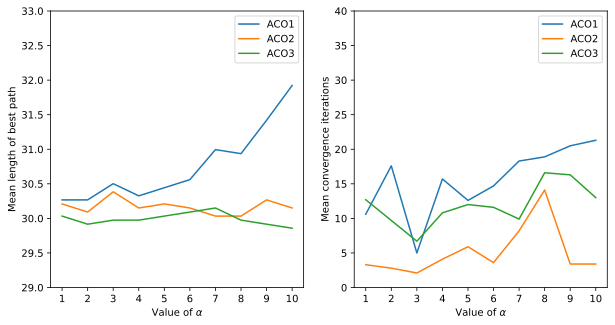

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

def plot_length(fig, ax, label1, label2, param):
    ax.plot(res_range1, res_length1, label=label1)
    ax.plot(res_range2, res_length2, label=label2)
    ax.plot(res_range2, res_length3, label=label3)
    ax.set_xticks(res_range1)
    # ax.set_xscale('log')
    ax.legend()
    ax.set_ylim(29,33)
    ax.set_xlabel(f'Value of {param}')
    ax.set_ylabel('Mean length of best path')
    

def plot_converge(fig, ax, label1, label2, param):
    ax.plot(res_range1, res_converge1, label=label1)
    ax.plot(res_range2, res_converge2, label=label2)
    ax.plot(res_range3, res_converge3, label=label3)
    ax.set_xticks(res_range1)
    # ax.set_xscale('log')
    ax.set_ylim(0,40)
    ax.legend()
    ax.set_xlabel(f'Value of {param}')
    ax.set_ylabel('Mean convergence iterations')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

label1 = 'ACO1'
label2 = 'ACO2'
label3 = 'ACO3'
param = '$\\alpha$'

plot_length(fig, ax1, label1, label2, param)
plot_converge(fig, ax2, label1, label2, param)
